<a href="https://colab.research.google.com/github/jovanoski05/learning/blob/main/regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинско учење: Регресија

---




## Што е машинско учење?

## Што е модел на машинско учење?

## Какви модели можат да постојат и која е нивната употреба?

## Модел на регресија

## Конструкција на модел

### Внесување на потребните библиотеки кои ќе ги користиме за нашиот модел

Пред да започнеме со самта изработка и објаснување на моделот, потребно е да се внесат некои неопходни библиотеки кои ќе ги користиме и кои содржат одредени функции.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

Во нашиот модел на машинско учење ќе употребие 3 библиотеки:


*   NumPy - Библиотека која се користи најмногу за работа со низи и матрици во програмскиот јазик Python
*   Pandas - Библиотека оја ќе ни овозможи да манипулираме и да ги обработуваме податоците
*   MatPlotLib - Библиотека која ќе ја користие за цртање на различни видови на графици


### Обработка на податоците

При работа со модели на машинско учење, потребни се податоци од кои модело ќе учи. За нашиот модел да биде што е можно поуспешен потребно е претходно чистење и обработување на податоците.

Тоа ќе го направиме со помош на вградените функции во библиотеката Pandas, но претходно треба да ги преземеме и да ги разгледаме истите.

In [ ]:
df = pd.read_csv("train.csv")

display(df)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


Видовме за каков вид на податоци станува збор и со колку редици и колони ќе работиме.

Според податоците кои ги добивме дознаваме дека се работи за 29451 куќа.

Следен чекор е да се одделат колоните кои не ни се потребни.

In [ ]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [ ]:
#Oddeluvanje na koloni

print(df.columns)

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')


In [ ]:
#cistenje od nepotrebni koloni

train_df=df.drop(columns=['ADDRESS', 'POSTED_BY'])

train_df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0


<ipython-input-6-460ecbda8b19>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

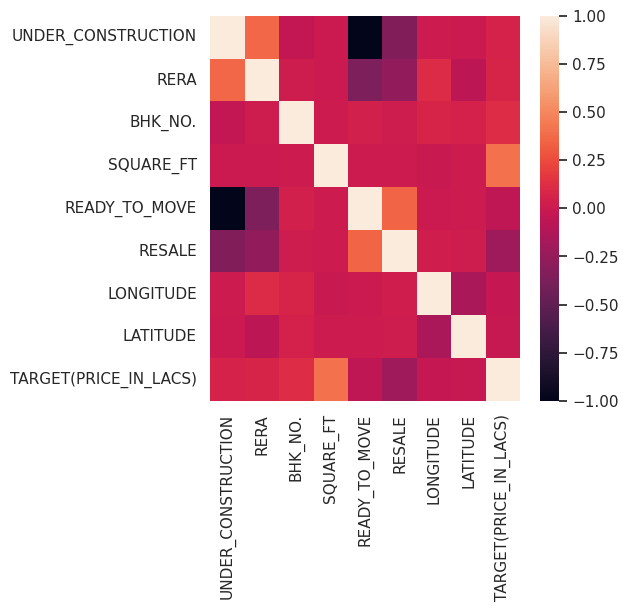

In [ ]:
#ja gledame zavisnosta megju cenata i ostanatite parametri

sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(train_df.corr())

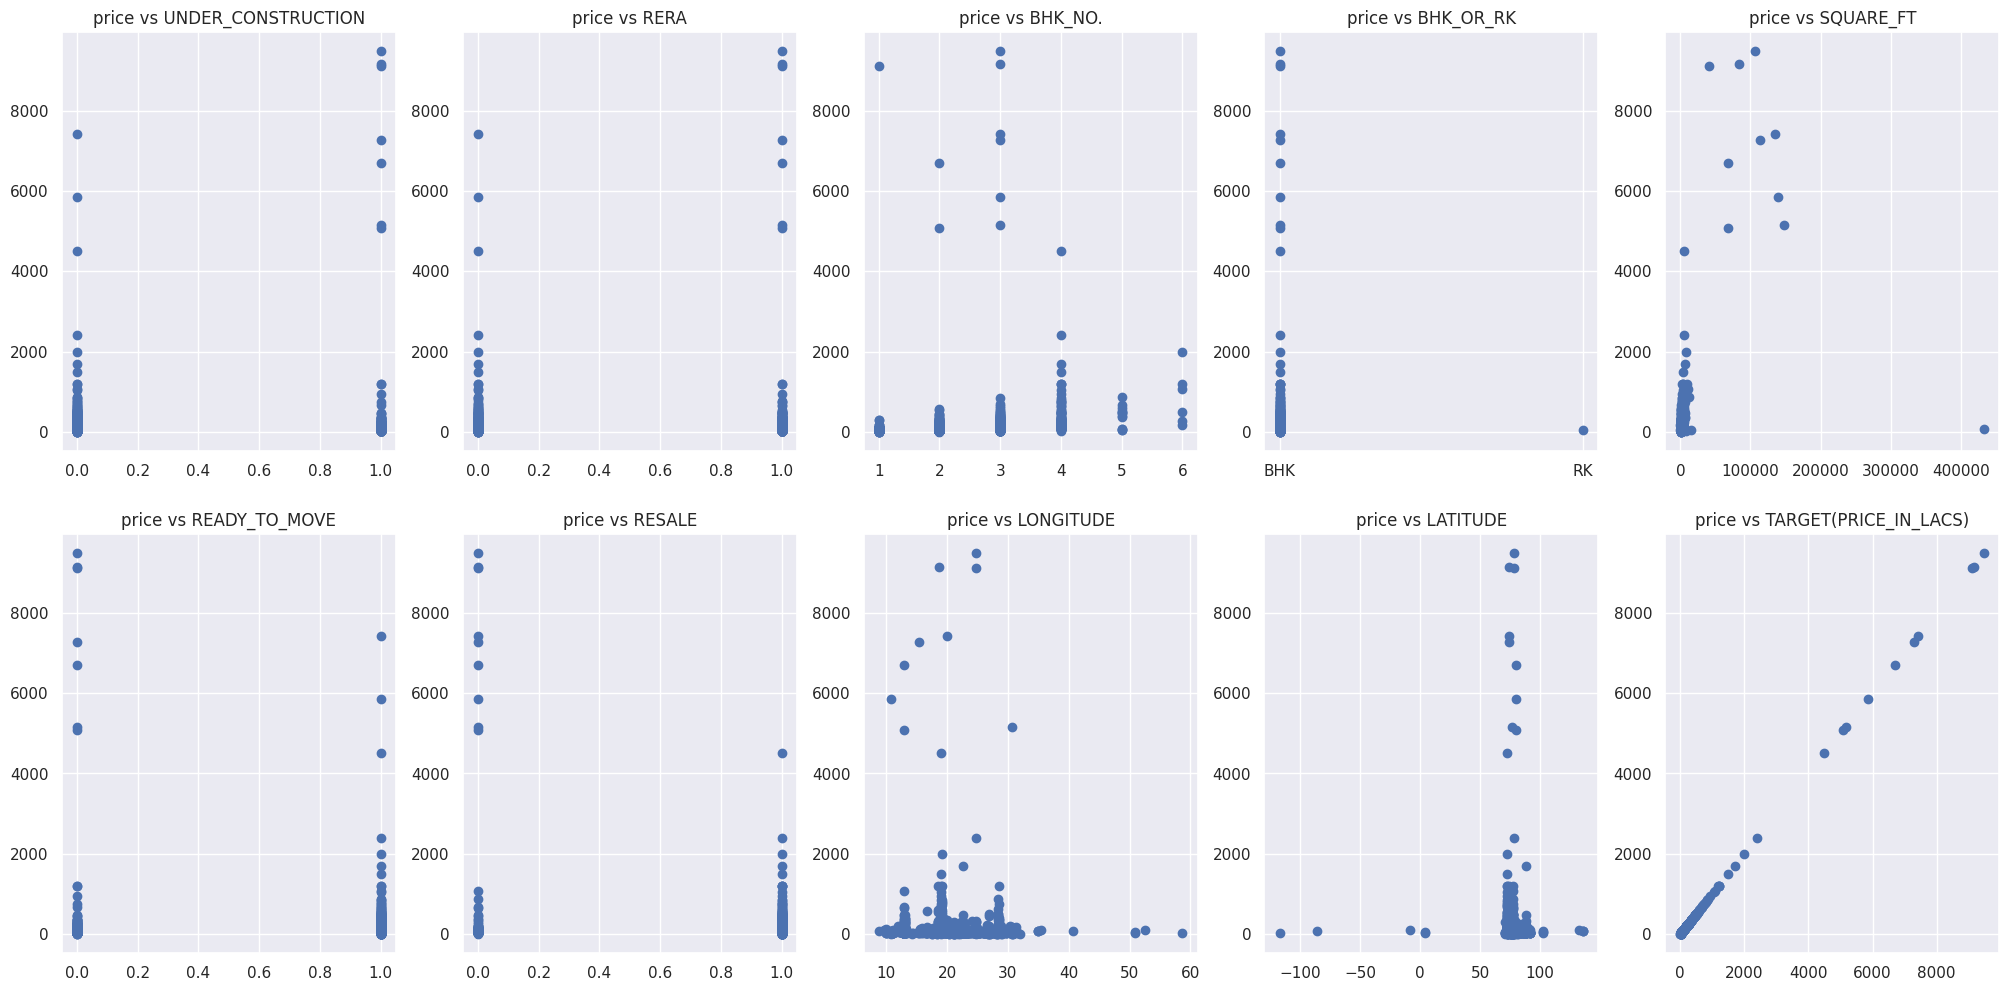

In [ ]:
#Pokazuvanje na zavisnosta megju parametrite i cenata TARGET

_y=train_df['TARGET(PRICE_IN_LACS)'][:2000].to_numpy()

plt.figure(figsize=(25, 25))
b=1
for i in train_df.columns:
  _x=train_df[i][:2000].to_numpy()
  plt.subplot(4, 5, b)
  plt.scatter(_x, _y)
  plt.title('price vs '+i)
  b+=1

После завршените анализи се гледа како зависи ценат од останатите параметри кои ги имаме во податоците кои ни се даден

Во овој дел ќе конструираме модел на машинско учење кој ќе ги предвидува цените на дадените објекти врз основа на некои информаци и податоци кои ќе му ги овозможиме.

Пред да започнеме со самата конструкција и изработка на моделот потребно е множеството на податоци да го подлелиме на 2 множества на податоци:


*   Тренинг множество
*   Тест множество



In [ ]:
#podelba na mnozestva so podatoci koi kje gi zema modelot i mnozestvo so rezultantni vrednosti

X=train_df.drop(columns=['TARGET(PRICE_IN_LACS)', 'BHK_OR_RK'])
y=train_df['TARGET(PRICE_IN_LACS)']

display(X.head())
display(y.head())

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,2,1300.236407,1,1,12.969910,77.597960
1,0,0,2,1275.000000,1,1,12.274538,76.644605
2,0,0,2,933.159722,1,1,12.778033,77.632191
3,0,1,2,929.921143,1,1,28.642300,77.344500
4,1,0,2,999.009247,0,1,22.592200,88.484911


0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [ ]:
#podelba na train i test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=389)

display(X_train)
display(y_train)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
10457,0,1,1,600.057837,1,1,28.642300,77.344500
21231,0,0,3,1330.944459,1,1,19.134700,72.855300
28516,0,0,1,560.010182,1,1,18.960000,72.820000
25129,0,0,3,1038.062284,1,1,12.907700,77.675500
495,0,0,1,674.966252,1,1,19.283600,72.867500
...,...,...,...,...,...,...,...,...
14845,0,1,4,2978.776219,1,1,18.551192,73.949936
24665,0,0,2,1150.026137,1,1,24.690280,78.418890
28606,1,1,1,420.347677,0,1,18.966670,72.833330
8321,1,1,2,699.681256,0,1,19.175900,72.952200


10457     41.5
21231    260.0
28516     88.0
25129     75.0
495       45.0
         ...  
14845    240.0
24665    110.0
28606     29.5
8321     180.0
16212    140.0
Name: TARGET(PRICE_IN_LACS), Length: 22088, dtype: float64

### Линеарна регресија

In [ ]:
#Model na linearna regresija

from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_train, y_train)
print('Train data:')
print(' rmse =', rmse)
print('score =', score)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test, y_test)
print()
print('Test data:')
print(' rmse =', rmse)
print('score =', score)

Train data:
 rmse = 575.519012001498
score = 0.21142816034422485

Test data:
 rmse = 617.9142175101695
score = 0.18033605458836677


### Нелинеарна регресија

In [ ]:
#Model na nelinearna regresija

from sklearn.preprocessing import PolynomialFeatures

k=2

C_train = X_train.to_numpy()
C_test = X_test.to_numpy()

trans = PolynomialFeatures(degree=k)
trans.fit(C_train, y_train)
C_trans_train = trans.transform(C_train)
C_trans_test = trans.transform(C_test)

c1_model=LinearRegression()
c1_model.fit(C_trans_train, y_train)

y_pred=c1_model.predict(C_trans_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
score=c1_model.score(C_trans_train, y_train)
print()
print("Non-linear train data:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("Score: ", score)

y_pred=c1_model.predict(C_trans_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
score=c1_model.score(C_trans_test, y_test)
print()
print("Non-linear test data:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("Score: ", score)




Non-linear train data:
MSE:  82831.04570699047
RMSE:  287.8038319880235
Score:  0.8027963002725218

Non-linear test data:
MSE:  11332249.404582176
RMSE:  3366.3406548628104
Score:  -23.327393519953315


## Overfitting

## Грешка кај моделите на машинско учење

## Споредба на моделите

## Заклучок